In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
ted = pd.read_csv('data.csv')
ted.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [4]:
ted.shape

(5440, 6)

In [5]:
ted_quantitative = ted[['views','likes']]
ted_qualitative = ted[['title', 'author', 'date', 'link']]

In [6]:
ted_quantitative.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,views,likes
count,5440.00000,5440.00000
mean,2061575.95790,62607.61673
std,3567097.76512,107646.76946
min,532.00000,15.00000
25%,670750.00000,20000.00000
50%,1300000.00000,40500.00000
75%,2100000.00000,65000.00000
max,72000000.00000,2100000.00000


In [7]:
ted_qualitative.describe()

,title,author,date,link
count,5440,5439,5440,5440
unique,5440,4443,200,5440
top,Climate action needs new frontline leadership,Alex Gendler,April 2018,https://ted.com/talks/ozawa_bineshi_albert_cli...
freq,1,45,127,1


In [8]:
ted[ted.isnull().any(axis=1)]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


In [9]:
ted_quantitative.corr()

,views,likes
views,1.000000,0.999661
likes,0.999661,1.000000


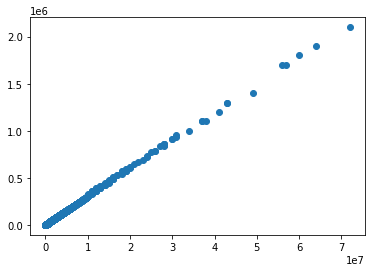

In [10]:
plt.scatter(ted['views'], ted['likes'])

intercept: 350.0277368793322
coefficient: [0.03020051]


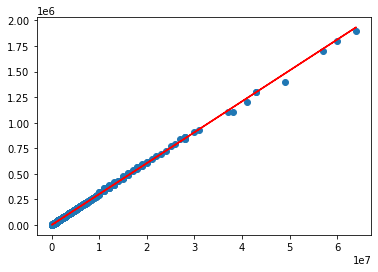

In [12]:
features = ['views']
x = ted[features]
y = ted['likes']
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3)
regressor = LinearRegression()
lin_reg = regressor.fit(X_train, y_train)

print('intercept:', lin_reg.intercept_)
print('coefficient:', lin_reg.coef_)

plt.scatter(X_train, y_train)

y_hat = X_train * lin_reg.coef_ + lin_reg.intercept_

plt.plot(X_train, y_hat, color='r') 

Adesso vogliamo andare a vedere in quali periodi sono state registrati i talks con il maggior numero di visualizzazioni. Per farlo aggiungiamo una colonna `year` al dataset.



In [92]:
ted['year'] = ted['date'].str.split(' ', expand=True)[1]

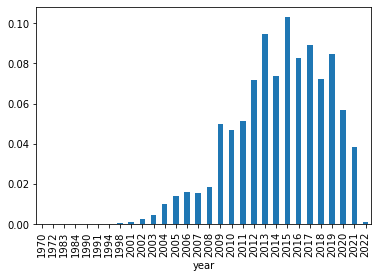

In [93]:
views = ted.groupby('year')['views'].sum()/ted['views'].sum() #normalizzazione
views.plot(kind='bar')

È possibile notare come c'è stata una crescita nel numero di visualizzazioni sino al 2015, anno in cui si è raggiunto il picco, e successivamente sono calate. Andiamo a vedere se il 2015 coincide anche con una diminuzione nel numero di talks prodotti.

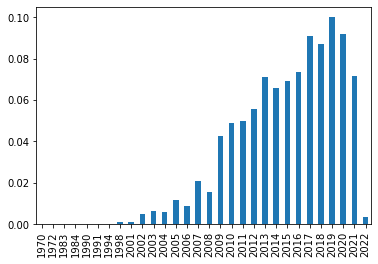

In [94]:
year = ted['year'].value_counts(normalize=True).sort_index()
year.plot(kind='bar')

È possibile notare come in realtà sino al 2019 sono stati prodotti un numero sempre maggiore di talks, quindi questo ci fa pensare che a partire dal 2015 la gente ha iniziato a perdere interesse siccome è presente un aumento di talks prodotti (sino al 2019), ma una diminuzione nelle views.
Per notarlo meglio aggiungiamo anche un grafico dove la linea rossa rappresenta il numero di talks pubblicati e quella blu il numero di visualizzazioni.

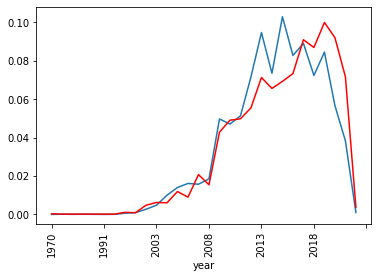

In [101]:
ax = views.plot(kind='line')
year.plot(ax=ax, kind='line', color='red', rot=90)

Siccome sono presenti più di 4000 autori, rappresentare tutti in un grafico sarebbe impossibile e per questo motivo andiamo a vedere quali sono i 10 autori che hanno realizzato il maggior numero di talks e quelli che hanno ottenuto il maggior numero di views.

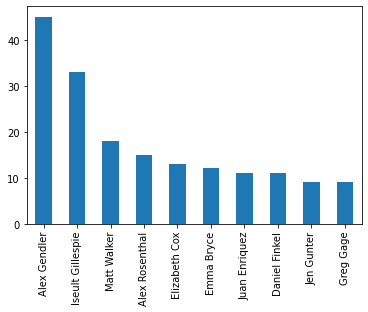

In [106]:
authorProduct = ted['author'].value_counts().nlargest(10)
authorProduct.plot(kind='bar')

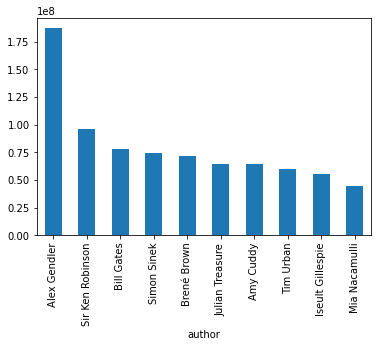

In [108]:
authorViews = ted.groupby('author')['views'].sum() #normalizzazione
authorViews = authorViews.nlargest(10)
authorViews.plot(kind='bar')

Si può notare come, tranne `Alex Gendler`, la maggior parte degli autori con il maggior numero di views non corrispondano con quelli che hanno pubblicato più talks. 
Adesso andiamo a vedere quali sono i 10 talks più guardati e chi è il loro autore.

In [115]:
bestTalks = ted.sort_values(by='views', ascending=False, ignore_index=True).nlargest(10, 'views')[['author', 'title']]
bestTalks

,author,title
0,Sir Ken Robinson,Do schools kill creativity?
1,Amy Cuddy,Your body language may shape who you are
2,Tim Urban,Inside the mind of a master procrastinator
3,Simon Sinek,How great leaders inspire action
4,Brené Brown,The power of vulnerability
5,Julian Treasure,How to speak so that people want to listen
6,Sam Berns,My philosophy for a happy life
7,Bill Gates,The next outbreak? We're not ready
8,Robert Waldinger,What makes a good life? Lessons from the longe...
9,Cameron Russell,"Looks aren't everything. Believe me, I'm a model."
